In [5]:
import numpy as np
import os

In [46]:
def cdc(y_true, y_pred, smooth=1):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    
    if intersection > 0:
        c = intersection / np.sum(y_true_f * np.sign(y_pred_f))
    else:
        c = 1
    
    continuous_union = c * np.sum(y_true_f) + np.sum(y_pred_f)
    
    return (2. * intersection + smooth) / (continuous_union + smooth)

def cdc_loss(y_true, y_pred):
    return 1-cdc(y_true, y_pred)

In [79]:
def fpr(y_true, y_pred):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    inverse_y_true_f = 1 - y_true_f
    inverse_y_pred_f = 1 - y_pred_f
    
    tp = np.sum(y_true_f * y_pred_f)
    fp = np.sum(y_pred_f) - tp
    tn = np.sum(inverse_y_true_f * inverse_y_pred_f)
    fn = np.sum(inverse_y_pred_f) - tn
    
    if fp + tn == 0:
        smooth = 1
    else:
        smooth = 0

    return (fp + smooth) / (fp + tn + smooth)

In [80]:
def display(func1, func2, *args):
    print("CDC: {:.4f}\nFPR: {:.4f}\n".format(func1(*args), func2(*args)))

def weighted_sum(func1, func2, alpha, beta, *args):
    print("Weighted sum: {:.4f}".format(alpha * func1(*args) + beta * func2(*args)))

In [94]:
A = np.array([[0,0,0],
             [1,0,0],
             [0,1,0]])
B = np.array([[0,0,0],
             [1,0,1],
             [1,0,1]])
C = np.array([[0,0,0],
             [0,0,0],
             [0,0,0],])
D = np.array([[1,1,1],
             [1,1,1],
             [1,1,1],])

B_cont = np.array([[0.2,0.2,0.2],
                 [0.8,0.2,0.2],
                 [0.2,0.7,0.2]])
B_cont_2 = np.array([[0.1,0.1,0.1],
                 [0.8,0.1,0.1],
                 [0.1,0.7,0.1]])
B_cont_3 = np.array([[0.1,0.01,0.01],
                 [0.9,0.1,0.1],
                 [0.1,0.9,0.01]])

In [95]:
display(cdc_loss, fpr, A, B)
display(cdc_loss, fpr, A, A)
display(cdc_loss, fpr, C, D)
display(cdc_loss, fpr, D, C)

CDC: 0.5714
FPR: 0.4286

CDC: 0.0000
FPR: 0.0000

CDC: 0.9000
FPR: 1.0000

CDC: 0.9000
FPR: 1.0000



In [96]:
weighted_sum(cdc_loss, fpr, 1, 1, A, B)
weighted_sum(cdc_loss, fpr, 1, 1, A, A)
weighted_sum(cdc_loss, fpr, 1, 1, C, D)
weighted_sum(cdc_loss, fpr, 1, 1, D, C)

Weighted sum: 1.0000
Weighted sum: 0.0000
Weighted sum: 1.9000
Weighted sum: 1.9000


In [97]:
display(cdc_loss, fpr, A, B_cont)
weighted_sum(cdc_loss, fpr, 1, 1, A, B_cont)


CDC: 0.2593
FPR: 0.2000

Weighted sum: 0.4593


In [98]:
display(cdc_loss, fpr, A, B_cont_2)
weighted_sum(cdc_loss, fpr, 1, 1, A, B_cont_2)

CDC: 0.1489
FPR: 0.1000

Weighted sum: 0.2489


In [99]:
display(cdc_loss, fpr, A, B_cont_3)
weighted_sum(cdc_loss, fpr, 1, 1, A, B_cont_3)

CDC: 0.0855
FPR: 0.0614

Weighted sum: 0.1469


In [100]:
weighted_sum(cdc_loss, fpr, 1, 1, A, B_cont_3)
weighted_sum(cdc_loss, fpr, 1, 1, A, C)

Weighted sum: 0.1469
Weighted sum: 0.6667


In [113]:
################ Larger, sparse examples ################

A_sparse = np.zeros(shape=(255,255))
for i in range(10):
    A_sparse[i,i] = 1

B_sparse = A_sparse.copy() * 0.8
for i in range(20,30):
    B_sparse[i,i] = 0.3
C_sparse = np.zeros(shape=(255,255))
D_sparse = np.ones(shape=(255,255))

In [115]:
weighted_sum(cdc_loss, fpr, 1, 1, A_sparse, B_sparse)
weighted_sum(cdc_loss, fpr, 1, 1, A_sparse, C_sparse)
weighted_sum(cdc_loss, fpr, 1, 1, A_sparse, D_sparse)

Weighted sum: 0.1500
Weighted sum: 0.9091
Weighted sum: 1.9997


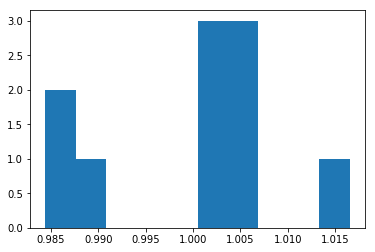

In [129]:
import matplotlib.pyplot as plt

R = np.random.rand(255,255)

hist, bin_edges = np.histogram(R, density=True)

plt.hist(hist)
plt.show()

In [132]:
n = 100
a = [x for x in range(n)]
from sklearn.utils import shuffle
a = shuffle(a, random_state=0)

In [133]:
a

[26,
 86,
 2,
 55,
 75,
 93,
 16,
 73,
 54,
 95,
 53,
 92,
 78,
 13,
 7,
 30,
 22,
 24,
 33,
 8,
 43,
 62,
 3,
 71,
 45,
 48,
 6,
 99,
 82,
 76,
 60,
 80,
 90,
 68,
 51,
 27,
 18,
 56,
 63,
 74,
 1,
 61,
 42,
 41,
 4,
 15,
 17,
 40,
 38,
 5,
 91,
 59,
 0,
 34,
 28,
 50,
 11,
 35,
 23,
 52,
 10,
 31,
 66,
 57,
 79,
 85,
 32,
 84,
 14,
 89,
 19,
 29,
 49,
 97,
 98,
 69,
 20,
 94,
 72,
 77,
 25,
 37,
 81,
 46,
 39,
 65,
 58,
 12,
 88,
 70,
 87,
 36,
 21,
 83,
 9,
 96,
 67,
 64,
 47,
 44]